In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import check_random_state
from sklearn.metrics.pairwise import distance_metrics
import math

In [3]:
import pandas as pd

In [4]:
cr = pd.read_csv('crime2.csv')

In [6]:
cr.head()

,localities,assassination,theft,gang_rape,burglary,rape,assualt_attack,harassment,crime_total,area_total,longitude,latatitude,area_per_million_km,crime_total_divided_area
0,JAFFARPUR KALAN,4,724,2,41,11,11,6,799,7.048170e+07,76.91555,28.59572,70.481699,11.336276
1,MUNDKA,3,244,1,14,5,12,4,270,4.859457e+07,76.96085,28.67042,48.594571,5.556176
2,BABA HARI DAS NAGAR,4,414,2,70,9,18,8,512,2.899435e+07,76.96681,28.62867,28.994346,17.658615
3,NAJAFGARH,4,900,1,60,4,10,10,973,8.473809e+06,76.98269,28.60975,8.473809,114.824393
4,CHHAWLA,4,485,1,65,6,16,11,575,2.632166e+07,76.99466,28.58691,26.321658,21.845129


In [7]:
from sqlalchemy import create_engine
database_username = 'b5a53e446f5cec'
database_password = '0f8d1ba3'
database_ip       = 'us-cdbr-iron-east-02.cleardb.net'
database_name     = 'heroku_7c3443583b90116'
database_connection = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))
cr.to_sql('initial', con=database_connection, if_exists='replace',chunksize=1000,index=False)


In [207]:

from sqlalchemy import create_engine
database_username = 'root'
database_password = ''
database_ip       = 'localhost'
database_name     = 'safepath'
database_connection = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name))
# cr.to_sql('initial', con=database_connection, if_exists='replace',chunksize=1000,index=False)


In [208]:
cr = pd.read_sql('SELECT * FROM initial', con=database_connection)

In [209]:
cr.head()

,localities,assassination,theft,gang_rape,burglary,rape,assualt_attack,harassment,crime_total,area_total,longitude,latatitude,area_per_million_km,crime_total_divided_area
0,JAFFARPUR KALAN,4,724,2,41,11,11,6,799,7.048170e+07,76.91555,28.59572,70.481699,11.336276
1,MUNDKA,3,244,1,14,5,12,4,270,4.859457e+07,76.96085,28.67042,48.594571,5.556176
2,BABA HARI DAS NAGAR,4,414,2,70,9,18,8,512,2.899435e+07,76.96681,28.62867,28.994346,17.658615
3,NAJAFGARH,4,900,1,60,4,10,10,973,8.473809e+06,76.98269,28.60975,8.473809,114.824393
4,CHHAWLA,4,485,1,65,6,16,11,575,2.632166e+07,76.99466,28.58691,26.321658,21.845129


In [210]:
data = cr.iloc[:,[1,2,3,4,5,6,7,12]].values

In [211]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
data = sc_X.fit_transform(data)

In [212]:
data

array([[0.16666667, 0.55032468, 0.16666667, ..., 0.13432836, 0.125     ,
        1.        ],
       [0.08333333, 0.16071429, 0.        , ..., 0.14925373, 0.075     ,
        0.68548925],
       [0.16666667, 0.2987013 , 0.16666667, ..., 0.23880597, 0.175     ,
        0.40384054],
       ...,
       [0.41666667, 0.16558442, 0.        , ..., 0.11940299, 0.075     ,
        0.        ],
       [0.16666667, 0.34902597, 0.        , ..., 0.23880597, 0.175     ,
        0.02433865],
       [0.        , 0.05357143, 0.        , ..., 0.        , 0.025     ,
        0.02885943]])

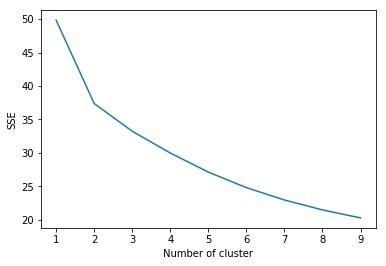

In [213]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [230]:
from sklearn.cluster import KMeans
import numpy as np
X = data

kmeans = KMeans(n_clusters=5,random_state=0).fit(X)
kmeans.labels_

pridiction=kmeans.predict(data)



In [231]:
safety = []
c = 0
for li in kmeans.cluster_centers_:
    sum = 0;
    sum += li[3] + li[5] + li[7]
    safety.append((sum,c))
    c += 1
safety = sorted(safety)

In [232]:
safety

[(0.25862822812351577, 2),
 (0.6466648022641845, 1),
 (0.6952591694521474, 0),
 (1.0579625658879555, 4),
 (1.211779985167674, 3)]

In [233]:
dict1 = {}
m = 0
for s in safety:
    dict1[s[1]] = m 
    m += 1

In [234]:
dict1

{2: 0, 1: 1, 0: 2, 4: 3, 3: 4}

In [235]:
# before
print(pridiction)

[4 4 4 1 4 4 4 4 3 4 4 4 0 3 0 4 3 1 2 1 1 4 0 1 0 2 4 0 1 0 1 1 0 2 3 0 1
 1 1 1 1 2 4 0 3 0 1 4 2 0 1 1 3 4 1 2 1 0 1 1 1 1 1 2 0 0 1 1 1 0 4 1 1 2
 2 1 1 1 1 1 2 2 0 3 3 2 1 0 0 2 1 0 2 1 0 1 1 2 0 1 0 3 0 1 1 2 2 1 2 1 2
 0 0 1 2 2 2 3 2 2 0 1 2 0 2 2 3 2 1 1 2 0 1 2 2 0 0 2 2 0 1 2 0 1 1 0 0 0
 0 2 0 0 1 2 1 1 2 2 0 3 0 2 2 2 1 2]


In [236]:
for i in range(len(pridiction)):
    pridiction[i]=dict1[pridiction[i]]

In [237]:
# after
print(pridiction)

[3 3 3 1 3 3 3 3 4 3 3 3 2 4 2 3 4 1 0 1 1 3 2 1 2 0 3 2 1 2 1 1 2 0 4 2 1
 1 1 1 1 0 3 2 4 2 1 3 0 2 1 1 4 3 1 0 1 2 1 1 1 1 1 0 2 2 1 1 1 2 3 1 1 0
 0 1 1 1 1 1 0 0 2 4 4 0 1 2 2 0 1 2 0 1 2 1 1 0 2 1 2 4 2 1 1 0 0 1 0 1 0
 2 2 1 0 0 0 4 0 0 2 1 0 2 0 0 4 0 1 1 0 2 1 0 0 2 2 0 0 2 1 0 2 1 1 2 2 2
 2 0 2 2 1 0 1 1 0 0 2 4 2 0 0 0 1 0]


In [203]:
print(cr["localities"].values)

['JAFFARPUR KALAN' 'MUNDKA' 'BABA HARI DAS NAGAR' 'NAJAFGARH' 'CHHAWLA'
 'KANJHAWALA' 'DWARKA NORTH' 'BAWANA' 'RANHOLA' 'BAWANA' 'BEGUM PUR'
 'DWARKA SEC-23' 'AMAN VIHAR' 'UTTAM NAGAR' 'BINDAPUR' 'DWARKA SOUTH'
 'NANGLOI' 'BINDAPUR' 'VIKAS PURI' 'NIHAL VIHAR' 'SULTAN PURI'
 'SHAHBAD DAIRY' 'JANAK PURI' 'PALAM VILLAGE' 'DABRI' 'SAGARPUR'
 'KAPASHERA' 'NARELA' 'MIANWALI NAGAR' 'MANGOLPURI' 'HARI NAGAR'
 'PASCHIM VIHAR' 'TILAK NAGAR' 'VIJAY VIHAR' 'KHYALA' 'ROHINI SOUTH'
 'ROHINI NORTH' 'RANI BAGH' 'RAJOURI GARDEN' 'RAJOURI GARDEN' 'MAYA PURI'
 'KN KATJU MARG' 'DELHI CANTT' 'PRASHANT VIHAR' 'PUNJABI BAGH'
 'KIRTI NAGAR' 'NARAINA' 'ALIPUR' 'SAMAYPURBADLI' 'SUBHASH PLACE'
 'INDERPURI' 'MAURYA ENCLAVE' 'MOTI NAGAR' 'FATEHPUR BERI'
 'VASANT KUNJ NORTH' 'VASANT KUNJ SOUTH' 'SWARUP NAGAR' 'SHALIMAR BAGH'
 'PATEL NAGAR' 'RANJIT NAGAR' 'KESHAV PURAM' 'MAHENDRA PARK'
 'BHALSWA DAIRY' 'VASANT VIHAR' 'ANAND PARBAT' 'ASHOK VIHAR'
 'JAHANGIR PURI' 'ADRASH NAGAR' 'BHARAT NAGAR' 'SOUTH CAMPUS' 'MEHRAULI

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


X = cr.iloc[0:166, 0].values
y1 = cr.iloc[:, 10].values
y2 = cr.iloc[:, 11].values
y = pridiction
places = cr["localities"].values
new_array= []
for i in range(0, 166):
    str = places[i]+", Delhi, India"
    new_array.append(str)


lati = y2
longi = y1

ar = []
   
for i in range(0, 166):
    y1[i] = round(y1[i], 4)
    y2[i] = round(y2[i], 4)

    o = {  "n": places[i],
        "type": "Feature",
           "properties": { 'mag': y[i]   },                 
            'lati': y1[i], 
            'longi': y2[i]
           
            
        }
    ar.append(o)
print(ar)


[{'n': 'JAFFARPUR KALAN', 'type': 'Feature', 'properties': {'mag': 3}, 'lati': 76.9156, 'longi': 28.5957}, {'n': 'MUNDKA', 'type': 'Feature', 'properties': {'mag': 3}, 'lati': 76.9608, 'longi': 28.6704}, {'n': 'BABA HARI DAS NAGAR', 'type': 'Feature', 'properties': {'mag': 3}, 'lati': 76.9668, 'longi': 28.6287}, {'n': 'NAJAFGARH', 'type': 'Feature', 'properties': {'mag': 1}, 'lati': 76.9827, 'longi': 28.6098}, {'n': 'CHHAWLA', 'type': 'Feature', 'properties': {'mag': 3}, 'lati': 76.9947, 'longi': 28.5869}, {'n': 'KANJHAWALA', 'type': 'Feature', 'properties': {'mag': 3}, 'lati': 77.0036, 'longi': 28.7258}, {'n': 'DWARKA NORTH', 'type': 'Feature', 'properties': {'mag': 3}, 'lati': 77.0156, 'longi': 28.6037}, {'n': 'BAWANA', 'type': 'Feature', 'properties': {'mag': 2}, 'lati': 77.0228, 'longi': 28.8066}, {'n': 'RANHOLA', 'type': 'Feature', 'properties': {'mag': 4}, 'lati': 77.036, 'longi': 28.6538}, {'n': 'BAWANA', 'type': 'Feature', 'properties': {'mag': 2}, 'lati': 77.0425, 'longi': 28.